# Tides
## What causes tides?

Tides are caused by gravitational attraction to nearby celestial bodies.  The water on Earth is affected mainly by the Moon, because it is so close, and the Sun, because it is so massive.

### The Moon's contribution to tides
First, we will look at the influence of the Moon on Earth's water.  The primary bulge on the surface of the Earth facing the Moon is intuitive;  The Moon is on that side and its gravity pulls on the water.  The secondary bulge on the opposite face of the Earth is more elusive.  The center of mass of the Earth-Moon system is located inside the Earth, but slightly closer to the Moon.  As the Earth-Moon system rotates around this center of mass, the centripetal force pushes water to the outside, which is the side opposite the Moon.  The tidal bulge can be seen in blue below.  The Earth is the green circle and the Moon is the grey circle.

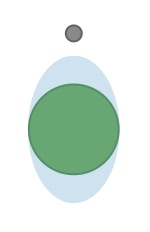

In [9]:
from IPython.display import Image
Image("../Figures/TidalBulge.jpg")

The moon revolves around the Earth as the Earth rotates around its axis.  The period of Earth's rotation is 24 hours, while the period of the Moon's revolution around the Earth is ~28 days.  As the Earth rotates underneath the Moon, it moves through the Moon's tidal bulge.  This can be seen in the figure below.  A single point on Earth has been highlighted as a red dot.  Initially, the red dot starts out at the crest of the tidal bulge and is experiencing high tide.  After 6 hours, the red dot has moved underneath the bulge and has moved to the trough of the bulge known as low tide.  Continuing through the day, the red dot experiences another crest (high tide) and another trough (low tide) before returning to the initial position at high tide.  

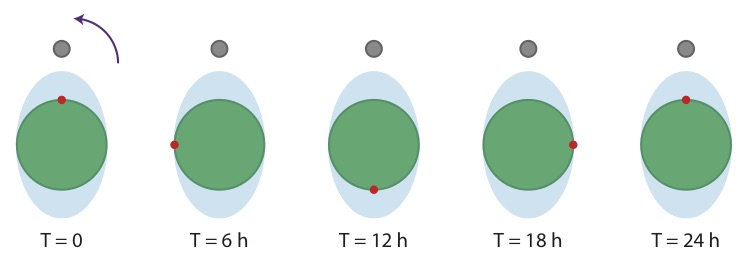

In [12]:
Image ("../Figures/Earth_Moon_Tides_Simple.jpg")

However, the Moon revolves around the Earth in the same direction that the Earth rotates around its axis.  As such, after 24 hours the Moon has advanced past its original position.  The Earth has to rotate for an additional 50 minutes to be positioned underneath the moon.  The correct representation is shown below.

In [ ]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
#Load data
data = pd.read_csv('../Data/2014_PortTownsend.csv', parse_dates=['Date Time'])
import plotly.plotly as py
import plotly.graph_objs as go
data_datetime = pd.DatetimeIndex(data['Date Time'])
def f(data):
    data = data.copy()
    data['Year'] = pd.DatetimeIndex(data['Date Time']).year
    data['Month'] = pd.DatetimeIndex(data['Date Time']).month
    data['Day'] = pd.DatetimeIndex(data['Date Time']).day
    data['Hour'] = pd.DatetimeIndex(data['Date Time']).hour
    data['Minute'] = pd.DatetimeIndex(data['Date Time']).minute
    data['Time'] =  data['Hour'] + data['Minute']/60
    return data
#daily_tides_PT = (data_datetime.date=='01012014',' Water Level')

#data1 = data['Date Time']
#daily_tides_PT
#plt.plot(daily_tides_PT)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)

#ax1.plot(x,y)
#ax1.set_title('Setting Custom Axis  Range for time series')

In [ ]:
data1 = f(data)
data2014 = data1.query('Year == 2014')
data012014 = data2014.query('Month == 1')
data01012014 = data012014.query('Day == 1')
data01012014_simp = data01012014[['Time','Water Level']]
data01012014_simp

In [ ]:
data01012014_simp.sort_values(by=['Water Level', 'Time'], ascending=True)

In [ ]:
data01012014_simp[(data01012014_simp.Time >= 15) & (data01012014_simp.Time <= 20)]

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(data01012014['Time'], data01012014['Water Level'])
plt.scatter(22.8, 9.5)
plt.xlabel("Time (H)")
plt.ylabel("Water Depth based on MLLW")
ax.set_title("Port Townsend Water Level by Time showing High and Low Tide")
plt.show()

In [ ]:
#plt.xlabel("Time (H)")
#plt.ylabel("Water Level")
#ax.set_title("Port Townsend Water Level by Time showing High and Low Tide")
#plt.show()
#import seaborn
#seaborn.set()
#data01012014.groupby(['Time'])['Water Level'].mean().plot.bar()

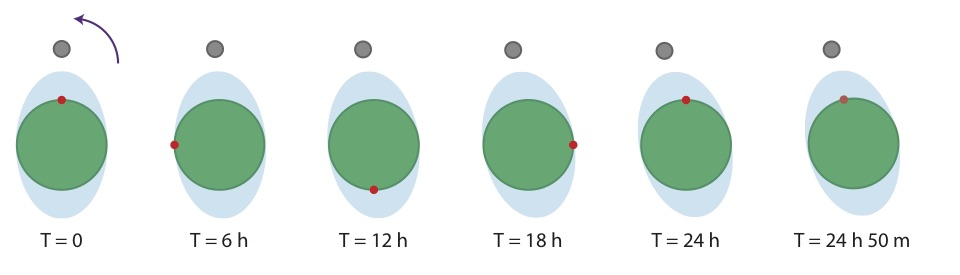

In [13]:
Image("../Figures/Earth_Moon_Tides_Real.jpg")

### The Sun's contribution to tides

The Sun, although much more massive than the Moon, is farther away from Earth than the Moon and has less of an effect on the Earth's tides than the Moon.  However, it still creates its own tidal bulge.  The bulge from the sun is similar to the one formed by the moon.  Thus, the resulting bulge that the Earth sees is a sum of the two bulges: the one from the Moon and the one from the Sun.  The tidal bulge due to the Sun is in yellow and the tidal bulge from the Moon is in blue.

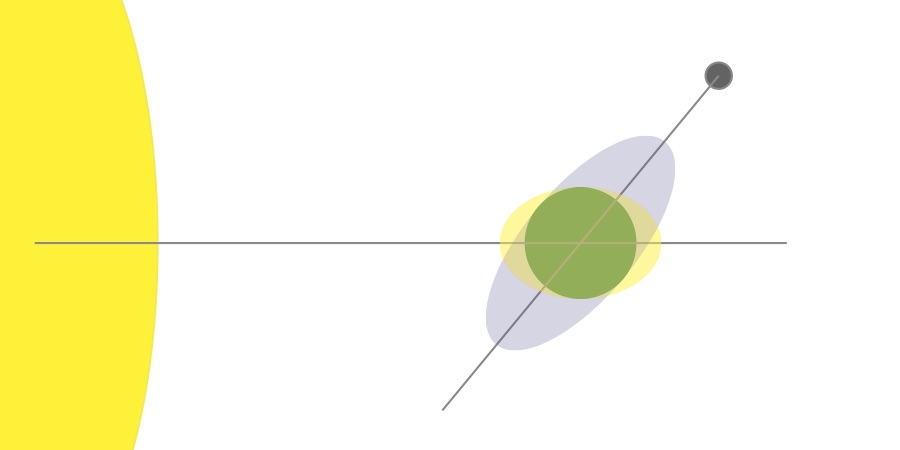

In [25]:
Image("../Figures/SunMoon_sum.jpg")

#### Phases of the Moon

First, we will review the phases of the Moon.  The amount of the moon that is visible (illuminated) from Earth is dependent on its position relative to the Earth and Sun. When the Moon is positioned between the Sun and the Earth, it is called a New Moon, as shown below.  From Earth, if you look at the moon you will not see it.  The illuminated side is facing away from us.

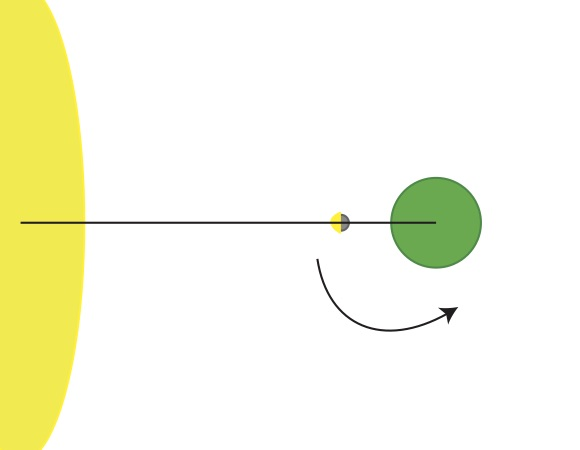

In [20]:
Image("../Figures/NewMoon.jpg")

When the Moon makes it a quarter of the way around the Earth, or 90 degrees, it has reached the phase known as First Quarter.  At the point the right half of the moon is illuminated when viewed from Earth, as seen below.

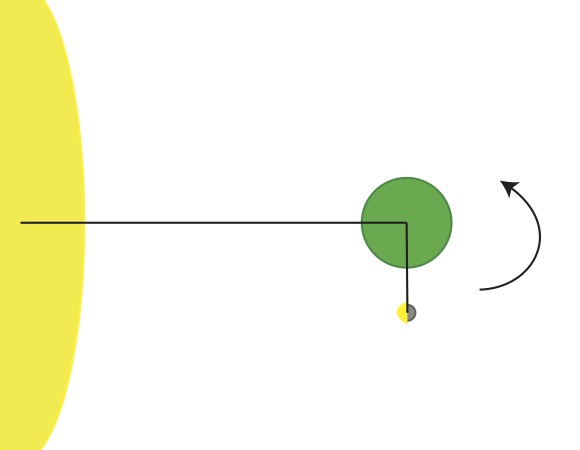

In [21]:
Image("../Figures/FirstQuarter.jpg")

When the Moon has moved another quarter of the way around Earth, it reaches the phase known as Full Moon.  When viewed from the Earth, the whole moon is illuminated and visible.  

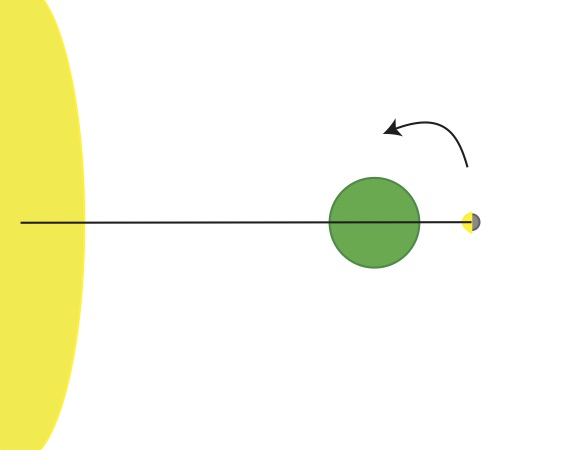

In [22]:
Image("../Figures/FullMoon.jpg")

Continuing through another quarter of the way around Earth puts it in the Third Quarter postion.  At this point, the left half of the Moon is illuminated when viewed from Earth.

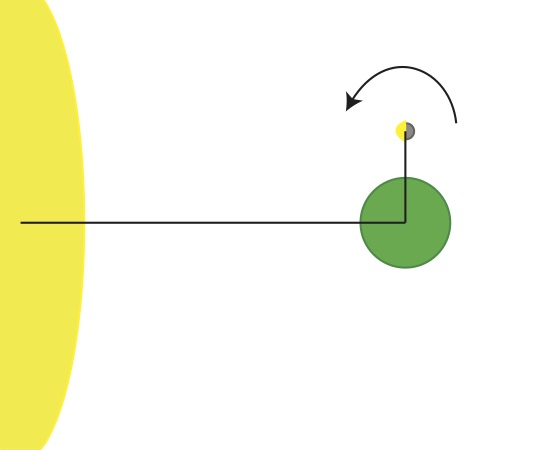

In [23]:
Image("../Figures/ThirdQuarter.jpg")

## Spring and Neap Tides

A Spring tide occurs when the Sun, Earth, and Moon are in a line, as in a New Moon or Full Moon.  This causes the tidal bulges from the Sun and Moon to align and results in a higher high tide and a lower low tide.

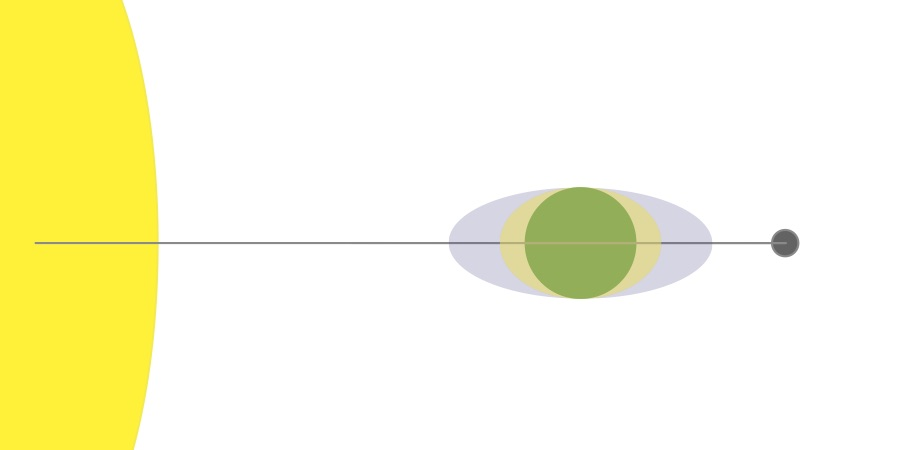

In [26]:
Image("../Figures/SunMoon_Full.jpg")

A Neap Tide occurs when the Moon is perpendicular to the line through the center of the Earth and Sun.  This occurs during First and Third Quarters.  This causes the tidal bulges to counter each other and results in a lower high tide and a higher low tide.

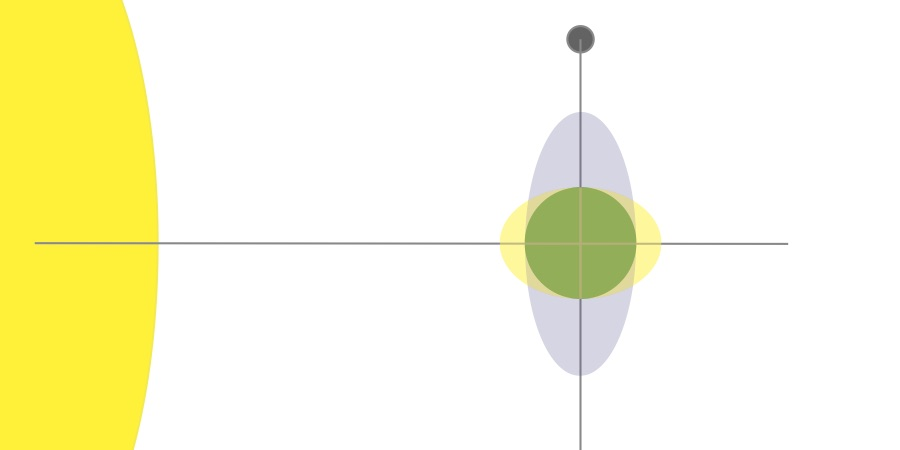

In [28]:
Image("../Figures/SunMoon_Third.jpg")

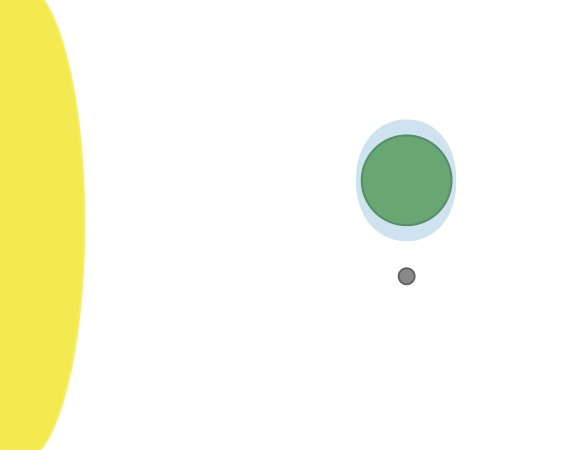

In [17]:
Image("../Figures/FirstQuarter.jpg")

As you can see, the difference between high tide and low tide during a Spring Tide is much larger than during a Neap Tide.

I am thinking one plot of a single day of tides accompanied by four images of earth/moon.  There will be one dot on each (red, green, blue, yellow) at first High, first Low, second High, second Low.  Corresponding to the time at which those tides occur. (I will draw the pictures in Illustrator).

Next, I see a description of how the phase of the moon affects the tides (Spring/Neap)
This will be accompanied by pictures showing the Earth/Moon/Sun in the correct arrangment for each (Four images again, new moon, first quarter, full mooon, third quarter)
There will be two Spring tide days (set of full moon and new moon dates are in the data folder) and two neap tide days (also in data folder).

All of this can just use data from one station.

Then we should pull in all three stations and (still working out exactly how I want to show this) show how the water level compares between the three across a day. (This is to show the ebb and flow of the tides into the sound, steep positive slope to flat to steep negative slope and back).

We may want to pick a full month of data to plot to show how the range of the tides changes throughout the month (from new moon to new moon).